Projeto Final do Módulo de Estatística

@author: João Baiochi

### Importação e Configuração

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import normaltest
from scipy.stats import pearsonr
from scipy.stats import norm

# define colors
colors = {
    'cyan': '#1696d2',
    'gray': '#5c5859',
    'black': '#000000',
    'yellow': '#fdbf11',
    'orange': '#ca5800',
    'magenta': '#af1f6b',
    'green': '#408941',
    'red': '#a4201d'
}
mpl.rcParams.update(mpl.rcParamsDefault) # avoid bug with plot margins on dark themes
color_palette = ['#1696d2', '#5c5859', '#fdbf11', '#af1f6b', '#408941']
sns.set_palette(color_palette)

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Statsmodels.api: {sm.__version__}')

Numpy: 1.20.3
Pandas: 1.3.4
Seaborn: 0.11.2
Statsmodels.api: 0.12.2


# Descrição do Projeto

A Autoridade De Estatística das Filipinas (PSA) lidera a realização da Pesquisa de Renda e Despesa Familiar (FIES) em todo o país.  
A pesquisa, realizada a cada 3 (três) anos, tem como objetivo fornecer dados sobre renda e despesas familiares, incluindo, entre outros, níveis de consumo por item de despesa, fontes de renda em dinheiro e informações relacionadas que afetam a renda e níveis de despesas e padrões nas Filipinas.   
Dessa forma, pede-se que seja elaborado um relatório prévio com insights e análise de dados por parte de um cientista de dados.

Clique <a href='https://s3-sa-east-1.amazonaws.com/lcpi/97fe77d1-2aec-4660-a799-c6eaccd14ea7.csv'>aqui</a> para baixar o dataset.

## Visualização do Dataset

In [2]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/97fe77d1-2aec-4660-a799-c6eaccd14ea7.csv')
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [67]:
# renaming columns for easy accession
df.columns = df.columns.str.replace(' ', '_')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total_Household_Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total_Food_Expenditure                         41544 non-null  int64 
 3   Main_Source_of_Income                          41544 non-null  object
 4   Agricultural_Household_indicator               41544 non-null  int64 
 5   Bread_and_Cereals_Expenditure                  41544 non-null  int64 
 6   Total_Rice_Expenditure                         41544 non-null  int64 
 7   Meat_Expenditure                               41544 non-null  int64 
 8   Total_Fish_and__marine_products_Expenditure    41544 non-null  int64 
 9   Fruit_Expenditure                              41544 non-null

In [4]:
null_values = df.isnull().sum()
null_values[null_values > 0]

Household Head Occupation         7536
Household Head Class of Worker    7536
dtype: int64

# <font color=Gold>Milestone 1

## <font color='orange'>Tarefa 1</font>
Calcule o tamanho de amostra ideal, considerando que você deseja estimar a média de dinheiro gasto com saúde (Medical Care Expenditure) com um erro máximo de 500, e um nível de confiança de 95%.  

In [5]:
max_error = 500
conf_level = 0.95
sig_level = 1 - conf_level

In [6]:
sigma = df['Medical_Care_Expenditure'].std()
z_alpha_2 = norm.ppf(0.95 + (0.05 / 2))
z_alpha_2

1.959963984540054

In [7]:
n_min = (z_alpha_2 * sigma / max_error)**2

In [8]:
n = round(np.ceil(n_min))
n

11121

In [9]:
population_mean = df['Medical_Care_Expenditure'].mean()
sample_error = [[n,abs(df['Medical_Care_Expenditure'].sample(n, random_state=101).mean() - population_mean) ] for n in range (2, df.shape[0]+1) ]

In [10]:
n_error = pd.DataFrame(sample_error, columns=['n', 'error'])
n_error.head()

,n,error
0,2,6334.730936
1,3,5517.564269
2,4,4882.730936
3,5,5262.230936
4,6,5495.564269


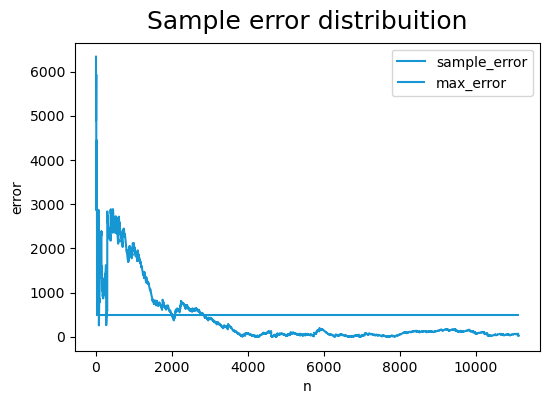

In [25]:
plt.figure(figsize=(6,4))
sns.lineplot(data=n_error.iloc[:n], x='n', y='error', label='sample_error')
plt.hlines(y=500, xmin=0, xmax=n, label='max_error')
plt.legend()
plt.title('Sample error distribuition', fontsize=18, pad=10);

In [12]:
print(f'Tamanho mínimo da amostra para nível de confiança 95% e erro máximo 500: {n}')

Tamanho mínimo da amostra para nível de confiança 95% e erro máximo 500: 11121


## <font color='orange'>Tarefa 2</font>
Obtenha uma amostra do dataset, considerando o tamanho da amostra que você calculou anteriormente e, em seguida, faça uma análise descritiva dos dados com, pelo menos, 10 variáveis quantitativas.  

In [71]:
sample_df = df.sample(n, random_state=101)
sample_df.shape


(11121, 60)

In [72]:
quantitative_features = sample_df.select_dtypes(include=['int64']).iloc[:,:10].columns.values
quantitative_features

array(['Total_Household_Income', 'Total_Food_Expenditure',
       'Agricultural_Household_indicator',
       'Bread_and_Cereals_Expenditure', 'Total_Rice_Expenditure',
       'Meat_Expenditure', 'Total_Fish_and__marine_products_Expenditure',
       'Fruit_Expenditure', 'Vegetables_Expenditure',
       'Restaurant_and_hotels_Expenditure'], dtype=object)

In [73]:
sample_df['Agricultural_Household_indicator'].value_counts()

0    7532
1    2372
2    1217
Name: Agricultural_Household_indicator, dtype: int64

A variável **Agricultural Household indicator** apresenta uma característica de variável qualitativa, portanto iremos substituir por outra

In [16]:
sample_df.select_dtypes(include=['int64']).iloc[:,10].head(3)

1849     880
29179      0
20513    432
Name: Alcoholic Beverages Expenditure, dtype: int64

In [74]:
quantitative_features[2] = 'Alcoholic_Beverages_Expenditure'

In [75]:
sample_df[quantitative_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Household_Income,11121.0,248771.872763,283928.225230,12141.0,104895.0,163360.0,292496.0,6452314.0
Total_Food_Expenditure,11121.0,85369.309594,52122.343632,5408.0,50856.0,73157.0,105683.0,691917.0
Alcoholic_Beverages_Expenditure,11121.0,1075.270839,2088.708776,0.0,0.0,270.0,1300.0,38220.0
Bread_and_Cereals_Expenditure,11121.0,25176.049636,13829.135190,0.0,16512.0,23377.0,31358.0,437467.0
Total_Rice_Expenditure,11121.0,18205.065552,12163.718364,0.0,10990.0,16559.0,23840.0,429640.0
Meat_Expenditure,11121.0,10558.656596,10428.335568,0.0,3324.0,7290.0,14420.0,132142.0
Total_Fish_and__marine_products_Expenditure,11121.0,10464.498067,7774.138424,0.0,5470.0,8643.0,13370.0,119640.0
Fruit_Expenditure,11121.0,2542.589066,2657.768725,0.0,1010.0,1835.0,3115.0,69319.0
Vegetables_Expenditure,11121.0,4981.193598,3289.452735,0.0,2850.0,4298.0,6252.0,49810.0
Restaurant_and_hotels_Expenditure,11121.0,15662.865929,23823.800049,0.0,1900.0,7340.0,19960.0,597150.0


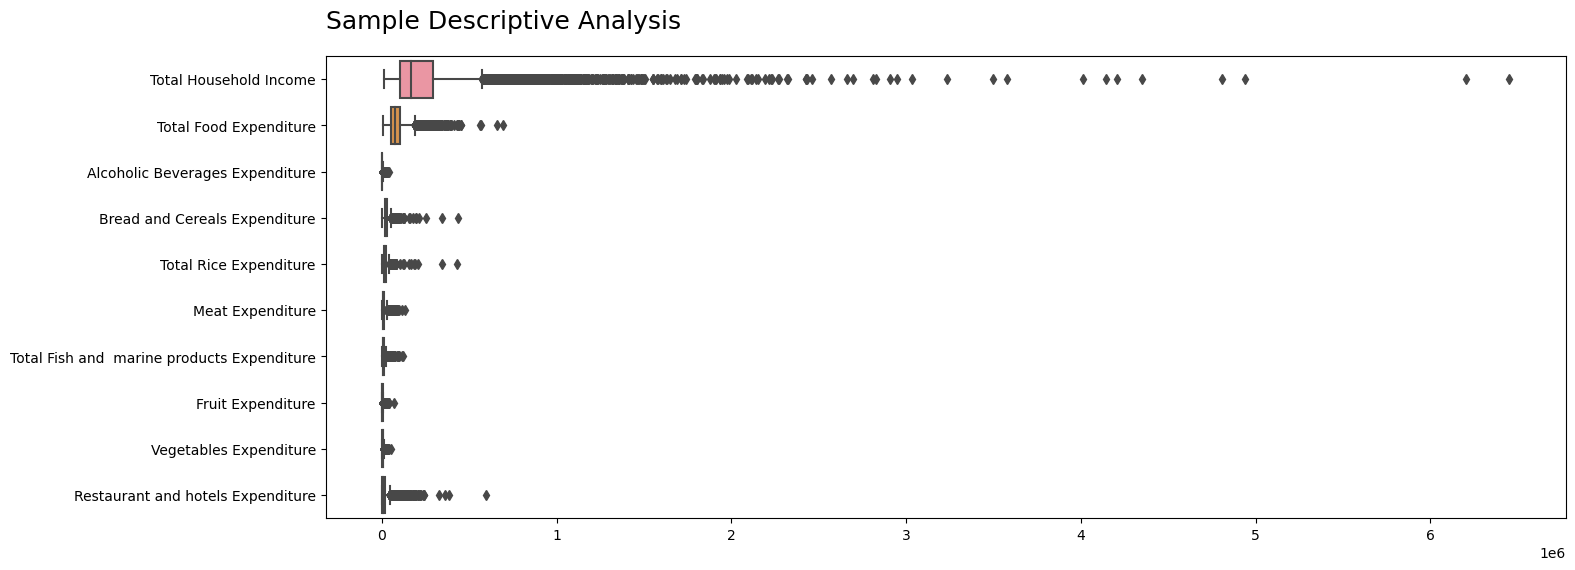

In [26]:
plt.figure(figsize=(16,6))
sns.boxplot(data = sample_df[quantitative_features], orient='h')
plt.title('Sample Descriptive Analysis', fontsize=18, pad=20, loc='left');

Podemos observar que as amostras possuem um alto nível de outliers, faremos a mesma análise retirando estes dados

In [76]:
iqr = sample_df[quantitative_features].quantile(0.75) - sample_df[quantitative_features].quantile(0.25)
iqr

Total_Household_Income                         187601.0
Total_Food_Expenditure                          54827.0
Alcoholic_Beverages_Expenditure                  1300.0
Bread_and_Cereals_Expenditure                   14846.0
Total_Rice_Expenditure                          12850.0
Meat_Expenditure                                11096.0
Total_Fish_and__marine_products_Expenditure      7900.0
Fruit_Expenditure                                2105.0
Vegetables_Expenditure                           3402.0
Restaurant_and_hotels_Expenditure               18060.0
dtype: float64

In [77]:
iqr.Total_Household_Income

187601.0

In [78]:
df.query(f'Total_Household_Income > {iqr.Total_Household_Income}')

,Total_Household_Income,Region,Total_Food_Expenditure,Main_Source_of_Income,Agricultural_Household_indicator,Bread_and_Cereals_Expenditure,Total_Rice_Expenditure,Meat_Expenditure,Total_Fish_and__marine_products_Expenditure,Fruit_Expenditure,...,Number_of_Refrigerator/Freezer,Number_of_Washing_Machine,Number_of_Airconditioner,"Number_of_Car,_Jeep,_Van",Number_of_Landline/wireless_telephones,Number_of_Cellular_phone,Number_of_Personal_Computer,Number_of_Stove_with_Oven/Gas_Range,Number_of_Motorized_Banca,Number_of_Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
6,198621,CAR,104644,Wage/Salaries,0,40992,36312,12968,12310,2565,...,0,0,0,0,0,2,0,0,0,1
9,625753,CAR,158721,Enterpreneurial Activities,0,56003,43239,26488,25678,3880,...,1,0,0,1,0,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41521,267330,XII - SOCCSKSARGEN,71609,Other sources of Income,2,22668,17370,5085,12217,4804,...,0,0,0,0,0,2,0,0,0,0
41522,299856,XII - SOCCSKSARGEN,92326,Wage/Salaries,2,24887,21336,3181,8003,1240,...,1,0,0,0,0,3,0,0,0,0
41523,252448,XII - SOCCSKSARGEN,91590,Other sources of Income,2,27537,23820,7760,9823,6721,...,1,1,0,0,1,4,1,0,0,0
41531,257600,XII - SOCCSKSARGEN,127422,Wage/Salaries,2,35120,27327,5273,11487,6372,...,1,0,1,0,0,2,1,1,0,1


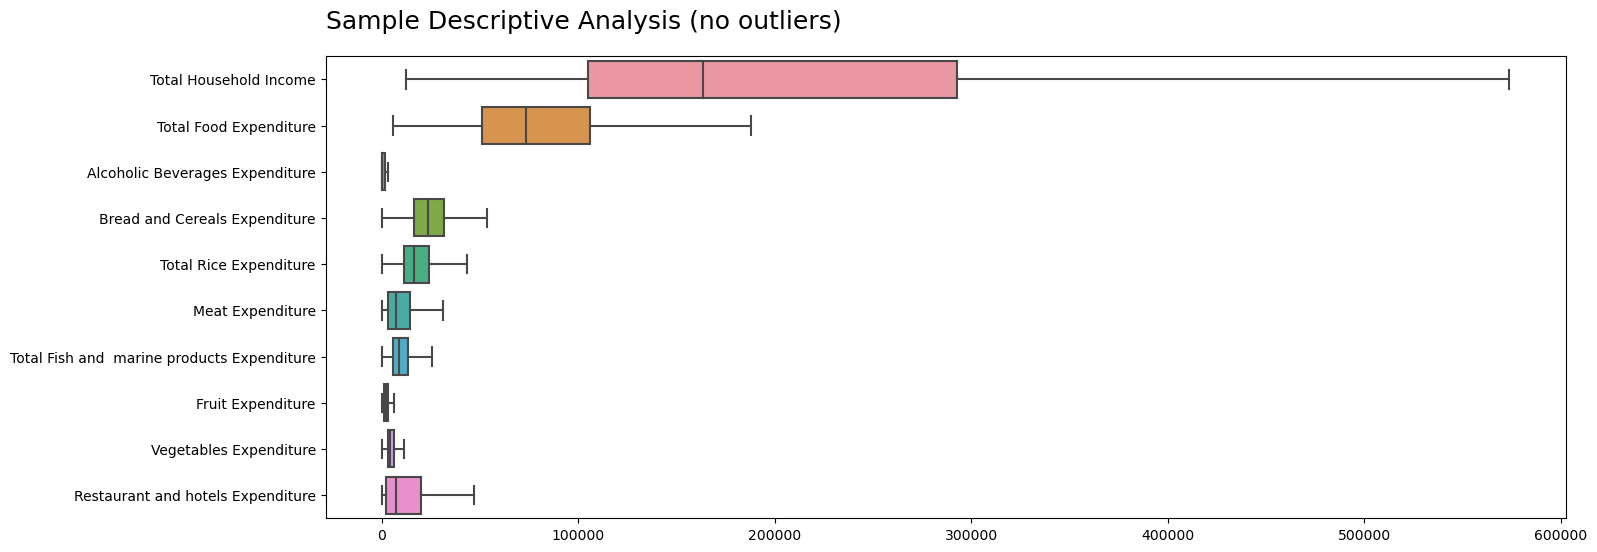

In [27]:
plt.figure(figsize=(16,6))
sns.boxplot(data = sample_df[quantitative_features], orient='h', showfliers=False)
plt.title('Sample Descriptive Analysis (no outliers)', fontsize=18, pad=20, loc='left');

# <font color=Gold>Milestone 2

## <font color='orange'>Tarefa 1</font>
Utilizando um nível de confiança de 95%, calcule o intervalo de confiança do dinheiro gasto com saúde e educação (colunas: Medical Care Expenditure e Education Expenditure).  

In [22]:
def calculate_ci(data, n=30, conf_level=0.95):
    
    sigma = data.std() #desvio padrão populacional

    #sig_level = 1 - conf_level
    #z_alpha_2 = norm.ppf(conf_level + (sig_level / 2))
    #error = z_alpha_2 * (sigma / np.sqrt(n))

    sample_mean = data.sample(n, random_state=101).mean()

    a, b = norm.interval(conf_level, loc=sample_mean, scale=sigma / np.sqrt(n))

    print(f'Intervalo de confiança {int(conf_level*100)}% para {data.name}: ({round(a,2)} , {round(b,2)})')


In [23]:
calculate_ci(df['Medical Care Expenditure'])
calculate_ci(df['Education Expenditure'])

Intervalo de confiança 95% para Medical Care Expenditure: (-2982.48 , 16270.68)
Intervalo de confiança 95% para Education Expenditure: (-1958.58 , 13227.51)


<AxesSubplot:ylabel='Medical Care Expenditure'>

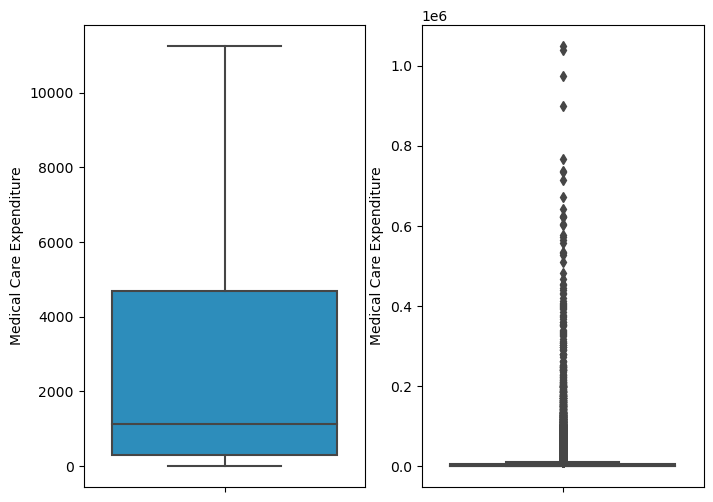

In [32]:
fig, axes = plt.subplots(1,2,figsize=(8,6))
sns.boxplot(y=df['Medical Care Expenditure'], showfliers=False, ax=axes[0])
sns.boxplot(y=df['Medical Care Expenditure'], showfliers=True, ax=axes[1])

## <font color='orange'>Tarefa 2</font>
Calcule se há diferença de média de número total de membros da família pelo sexo do chefe de família (Household Head Sex e Total Number of Family members) com 95% de confiança.  

## <font color='orange'>Tarefa 3</font>
Verifique se há diferença de média total de renda da família (Total Household Income) de acordo com a fonte salarial (Main Source of Income).  

*Considere “Enteroreneurial activities” e “other sources of income” como "outros".*

# <font color=Gold>Milestone 3

Usando Regressão Linear, crie um modelo de previsão de renda de forma a minimizar o erro. Considere 70% dos dados para treinar o modelo, e 30% para testá-lo. Por fim, utilize as métricas de avaliação do modelo que foram estudadas para validá-lo.  